In [391]:
#Part 1 of assignment: Modify the binary logistic regression classifier with iris Dataset, with our 2D dataset, preform max min normalization instead of z normalization

In [392]:
#First lets get all the code from the IRIS dataset file

import os

print(os.getcwd())
# Upload the data file in that folder
# - It will be deleted after your session
%matplotlib inline
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import random
import tensorflow
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()
print(print(tf.__version__))

C:\Users\chees\Desktop\USU\Semester Spring 2023\Special Topics_Deep Learning\DeepLearning_Larsen\DNN_Class_Spring_2023\Homework_2
2.11.0
None


In [393]:
#Read the data from CSV to pandas DATAFRAME: Changing the called CSV file to the x2d CSV file
iris = pd.read_csv('x2d.csv',header=None)
iris.columns = ["ID","Var1","Var2","Label"]
print(iris.shape)
iris.head()

(100, 4)


,ID,Var1,Var2,Label
0,0,5.1,3.5,1
1,1,4.9,3.0,1
2,2,4.7,3.2,1
3,3,4.6,3.1,1
4,4,5.0,3.6,1


In [394]:
#Features: Getting the first Onehundred features
iris = iris[:100]

In [395]:
#Covert the string lables to numerals: This section is unrequired for our dataset since they are already numbers

#iris.Species = iris.Species.replace(to_replace=['Iris-setosa', 'Iris-versicolor'], value=[0, 1])

X shape:  (100, 2) y shape:  (100,)
Number of total examples:  100  Number of features:  2


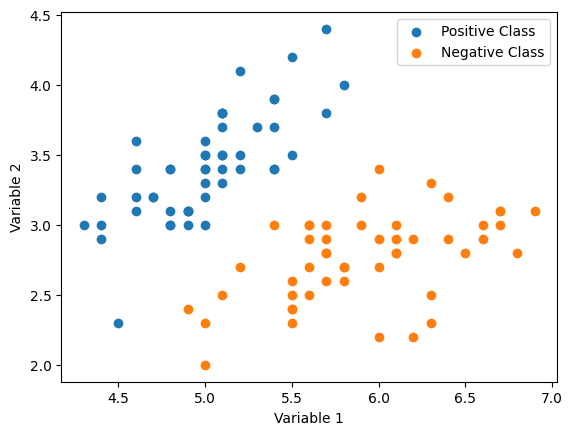

In [396]:
#Visualize two class examples in 2D space
plt.scatter(iris[:50].Var1, iris[:50].Var2, label='Positive Class')
plt.scatter(iris[51:].Var1, iris[51:].Var2, label='Negative Class')
plt.xlabel('Variable 1')
plt.ylabel('Variable 2')
plt.legend(loc='best')
#Define X and y
X = iris.drop(labels=['ID', 'Label'], axis=1).values
y = iris.Label.values
print("X shape: ", X.shape, "y shape: ", y.shape)
(m, n) = X.shape
print("Number of total examples: ", m, " Number of features: ", n)


In [397]:
#Split data
# Train: test(70 %:30 %)
value = 5
os.environ['PYTHONHASHSEED'] = str(value)
tensorflow.random.set_seed(value)
np.random.seed(value)
tf.set_random_seed(value)
tf.random.set_random_seed(value)
tensorflow.random.set_seed(value)
tensorflow.compat.v2.random.set_seed(value)
random.seed(value)
train_index = np.random.choice(len(X), round(len(X) * 0.7), replace=False)
print(train_index)

# diff set
test_index = np.array(list(set(range(len(X))) - set(train_index)))
print(test_index)
X_train = X[train_index]
y_train = y[train_index]
X_test = X[test_index]
y_test = y[test_index]

[66 32 46 28 74 23 10 20 17 35 97 37 70 40 60 34 42 57 12 69 94 56 22 39
 24 13 63 71 55 87  6 88 64 26 48 50 72 54 21 25 33 29 52 14 85 79 95  3
 43 11 98 45 83 67 89 86 49 82 59 19 81 38 68  2 31 84 51 36  4  0]
[ 1  5  7  8  9 15 16 18 27 30 41 44 47 53 58 61 62 65 73 75 76 77 78 80
 90 91 92 93 96 99]


In [398]:
#Normalize

#- Z normalization
# normalization: feature_value - mean(feature) / standard_deviation(feature)
def z_normalization(feat_val):
    feat_mean = np.mean(feat_val, axis=0)
    feat_sd = np.std(feat_val, axis=0)
    return np.divide(feat_val - feat_mean, feat_sd)

# Max-min normalization
# normalization: feature_value - min(feature) / max(feature) - min(feature)
def max_min_normalization(feat_val):
    feat_max = np.max(feat_val,axis=0)
    feat_min = np.min(feat_val,axis=0)
    return np.divide(feat_val-feat_min,feat_max-feat_min)

# z normalize
X_train = max_min_normalization(X_train)
X_test = max_min_normalization(X_test)

In [399]:
#Weight and bias initialization
W = tf.Variable(tf.random.normal(shape=[n, 1],seed=value))
print(W)
b = tf.Variable(tf.random.normal(shape=[1, 1],seed=value))
init = tf.global_variables_initializer()

<tf.Variable 'Variable_42:0' shape=(2, 1) dtype=float32_ref>


In [400]:
#Defining the placeholders
data = tf.placeholder(dtype=tf.float32, shape=[None, n])
target = tf.placeholder(dtype=tf.float32, shape=[None, 1])

In [401]:
#Model definition
mod = tf.matmul(data, W) + b

In [402]:
#Define accuracy
# The default threshold of sigmoid is 0.5, rounded off directly
prediction = tf.round(tf.sigmoid(mod))
# Bool into float32 type
correct = tf.cast(tf.equal(prediction, target), dtype=tf.float32)
# Average
accuracy = tf.reduce_mean(correct)
# End of the definition of the model framework

In [403]:
#Define loss function
#first doing a sigmoid on the model result and then using the cross-entropy loss function
loss = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(logits=mod, labels=target))

In [404]:
#Initialize hyperparameters
# - Batchsize
# - Learningrate
# - Number of iterations
learning_rate = 0.01
batch_size = 20
iter_num = 500

In [405]:
#Define the optimizer
opt = tf.train.GradientDescentOptimizer(learning_rate)

In [406]:
#Define the goal
# - minimize the defined loss
goal = opt.minimize(loss)

In [407]:
# Initialize variables that analyze learning progress
loss_trace = []
train_acc = []
test_acc = []

In [408]:
#Training
sess = tf.Session()
sess.run(tf.global_variables_initializer())
v_old = sess.run(W)
print(v_old)
for epoch in range(iter_num):
    # Generate random batch index
    batch_index = np.random.choice(len(X_train), size=batch_size)
    batch_X_train = X_train[batch_index]
    batch_y_train = np.matrix(y_train[batch_index]).T
    sess.run(goal, feed_dict={data: batch_X_train, target: batch_y_train})
    temp_loss = sess.run(loss, feed_dict={data: batch_X_train, target: batch_y_train})
    temp_train_acc = sess.run(accuracy, feed_dict={data: X_train, target: np.matrix(y_train).T})
    temp_test_acc = sess.run(accuracy, feed_dict={data: X_test, target: np.matrix(y_test).T})
    loss_trace.append(temp_loss)
    train_acc.append(temp_train_acc)
    test_acc.append(temp_test_acc)
    if (epoch + 1) % 10 == 0:
        print('epoch: {:4d} loss: {:5f} train_acc: {:5f} test_acc: {:5f}'.format(epoch + 1, temp_loss, temp_train_acc,
                                                                              temp_test_acc))
v = sess.run(W)
print(v)

[[-1.5148973]
 [ 1.1987396]]
epoch:   10 loss: 0.699106 train_acc: 0.471429 test_acc: 0.566667
epoch:   20 loss: 0.723367 train_acc: 0.471429 test_acc: 0.566667
epoch:   30 loss: 0.718301 train_acc: 0.471429 test_acc: 0.566667
epoch:   40 loss: 0.757887 train_acc: 0.471429 test_acc: 0.566667
epoch:   50 loss: 0.689980 train_acc: 0.471429 test_acc: 0.566667
epoch:   60 loss: 0.543276 train_acc: 0.471429 test_acc: 0.566667
epoch:   70 loss: 0.723759 train_acc: 0.471429 test_acc: 0.566667
epoch:   80 loss: 0.650037 train_acc: 0.471429 test_acc: 0.566667
epoch:   90 loss: 0.546462 train_acc: 0.471429 test_acc: 0.566667
epoch:  100 loss: 0.650542 train_acc: 0.471429 test_acc: 0.566667
epoch:  110 loss: 0.849915 train_acc: 0.471429 test_acc: 0.566667
epoch:  120 loss: 0.902073 train_acc: 0.471429 test_acc: 0.566667
epoch:  130 loss: 0.533425 train_acc: 0.471429 test_acc: 0.566667
epoch:  140 loss: 0.629259 train_acc: 0.471429 test_acc: 0.566667
epoch:  150 loss: 0.580713 train_acc: 0.471429 

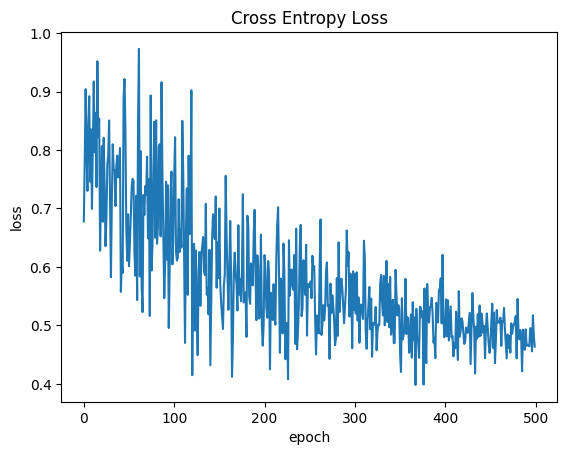

In [409]:
#Visualization of the loss function

plt.plot(loss_trace)
plt.title('Cross Entropy Loss')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

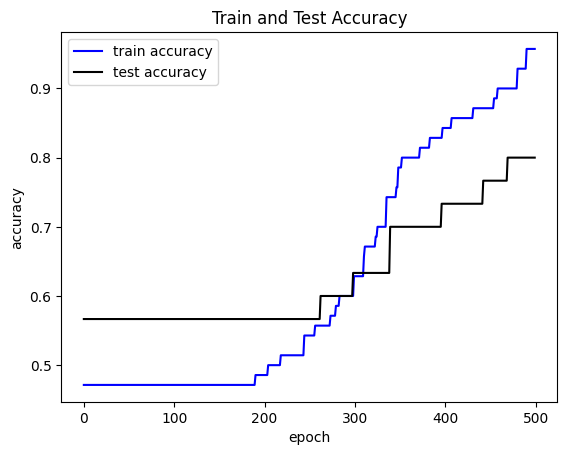

The values are set and the model trains and gives the same performance each time the code is ran.
Though no desired state was given for the accuracy of the model so I left it as the code was given.
The training accuracy is high while the test accuracy is low, therefore additional model tuning is required.
It could be fixed though by running different random seed numbers because when the code
was producing different results each time, there were runs with high accuracy for both parameters.
This code does provide consistent answers, though the performance is poor.
Part one of the problem just stated to get it to work with the 2D feature dataset of iris.


In [410]:
#Train and test accuracy visualization

plt.plot(train_acc, 'b-', label='train accuracy')
plt.plot(test_acc, 'k-', label='test accuracy')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.title('Train and Test Accuracy')
plt.legend(loc='best')
plt.show()

print("The values are set and the model trains and gives the same performance each time the code is ran.\nThough no desired state was given for the accuracy of the model so I left it as the code was given.\nThe training accuracy is high while the test accuracy is low, therefore additional model tuning is required.\nIt could be fixed though by running different random seed numbers because when the code\nwas producing different results each time, there were runs with high accuracy for both parameters.\nThis code does provide consistent answers, though the performance is poor.\nPart one of the problem just stated to get it to work with the 2D feature dataset of iris.")